In [1]:
import ROOT
import uproot
import numpy as np
import array as array
import math
import matplotlib.pyplot as plt
import pickle as pkl
#import statistics as st
ROOT.gStyle.SetOptStat(000000)

Welcome to JupyROOT 6.26/04


In [2]:
import subprocess
import sys

#### If running on ROOT casa image some packages necessary for opening our files and plotting are not installed

def install_package(package_name):
    # Install the package using subprocess to call pip
    subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

def import_packages():
    try:
        import mplhep  # Replace with the module name of the package
    except ImportError:
        print(f"{'mplhep'} not found. Installing...")
        install_package("mplhep")
        import mplhep  # Import again after installation
    try:
        import hist  # Replace with the module name of the package
    except ImportError:
        print(f"{'hist'} not found. Installing...")
        install_package("hist")
        import hist  # Import again after installation
    try:
        import coffea  # Replace with the module name of the package
    except ImportError:
        print(f"{'coffea'} not found. Installing...")
        install_package("coffea==0.7.22")
        import coffea  # Import again after installation
        
        
import_packages()
from TUnfold import *
from python.plotting import rebin_hist

0.7.22
4.3.7


In [3]:
#### open files                                                                                                                                               

channel = 'dijet'

if channel == 'trijet':
    fname_p = 'coffeaOutput/trijetHists_newUL18JECaddRho_QCDsim_rap2.5_nominalMG_allUncALL.pkl'
    fname_d = "coffeaOutput/trijetHists_newUL18JECaddRho_JetHT_rap2.5_nominalMG_allUncALL.pkl"
    fname_h = "coffeaOutput/trijetHists_newUL18JECaddRho_QCDsim_rap2.5_nominalherwig_allUncALL.pkl"
    fname_jk = 'coffeaOutput/trijetHists_newUL18JECaddRho_QCDsim_rap2.5_nominalMG_JKallUncALL.pkl'
else:
    fname_p = 'coffeaOutput/dijetHists_newUL18JECaddRho_QCDsim_rap2.5_MG_nominal__allUncALL.pkl'
    fname_d = "coffeaOutput/dijetHists_newUL18JECaddRho_JetHT_rap2.5_allUncALL.pkl"
    fname_h = "coffeaOutput/dijetHists_newUL18JECaddRho_QCDsim_rap2.5_herwig_nominal__allUncALL.pkl"
    fname_jk = 'coffeaOutput/dijetHists_newUL18JECaddRho_QCDsim_rap2.5_MG_nominal_JK_allUncALL.pkl'

with open(fname_p, "rb") as f:
    result= pkl.load( f )
    
with open(fname_d, "rb") as f:
    result_data = pkl.load( f )
    
with open(fname_h, "rb") as f:
    result_herwig = pkl.load( f )

with open(fname_jk, "rb") as f:
    output_jk= pkl.load( f )             
#### Adding gen underflow to 
##### Rebin inputs as desired
respHists = ['response_matrix_u', 'response_matrix_g', 'ptreco_mreco_u', 'ptreco_mreco_g', 'ptgen_mgen_u', 'ptgen_mgen_g','fakes', 'misses']
pt_edges = [bin[0] for bin in result["response_matrix_u"].project("ptreco").axes[0]] + [result["response_matrix_u"].project("ptreco").axes[0][-1][1]]
# print(result_data["response_matrix_u"].project("syst").axes[0].size)
    ##### dijet edges
if channel != "trijet":
    edges = [   0., 5., 10., 15., 20., 30.,  40., 50.,  60., 80.,  100.,  125.,  150., 
             175., 200.,  250.,300.,  800., 1300.]
    edges_gen = [   0., 10., 20., 40.,  60.,   100.,  150.,  200., 300., 1300.]

#### trijet edges
else:
    edges = [   0.,    5.,   10.,   15.,   20.,   30.,   40.,   50.,   60.,
         70.,   80.,   90.,  100., 110, 120., 140.,
        160.,  230.,  300.,  800., 1300.]
    edges_gen = [0, 10, 20, 40, 60, 80, 100, 120, 160, 300, 1300]
print(len(edges)-1, len(edges_gen)-1)
#### dijet pt edges
if channel != "trijet":
    pt_edges = [200, 290, 480, 570, 680, 13000]
#### trijet pt edges
else:
    pt_edges = [200, 290, 400, 570, 13000]
def rebinAllHists(results, hists, newbins, axis = 'ptreco'):
    for result in results:
        for histo in [h for h in result if h in hists]:
            axis_names = [ax.name for ax in result[histo].axes]
            if axis in axis_names:
                result[histo] = rebin_hist(result[histo], axis, newbins)
    return results
# rebinAllHists([result, result_data, result_herwig], respHists, pt_edges, axis = 'ptreco')
# rebinAllHists([result, result_data, result_herwig], respHists, pt_edges, axis = 'ptgen')
# rebinAllHists([result, result_data, result_herwig], respHists, edges, axis = 'mreco')
# rebinAllHists([result, result_data, result_herwig], respHists, edges_gen, axis = 'mgen')

18 9


In [4]:
# #### open files                                                                                                                                               
# # fname="coffeaOutput/trijetHists_wXSscaling_QCDsim_newMBins_rapidity2.5_nominal2018.pkl"
# fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_newMBinsDR_rapidity2.5_nominal2018.pkl"
# year = fname[-8:-4]
# with open(fname, "rb") as f:
#     result = pickle.load( f )

# if "dijet" in fname:
#     os_path = "plots/unfolding/dijet/"
#     channel = "Dijet"
# else:
#     os_path = "plots/unfolding/trijet/"
#     channel = "Trijet"
# checkdir(os_path)
# os_path=os_path
# print(year)                                                                                                                                                    
# axis_names = [ax.name for ax in result['ptreco_mreco_u'].axes]
# cats = [cat for cat in result['ptreco_mreco_u'].project('ptreco','mreco').axes[0]]
# availSysts = [ax for ax in result['ptreco_mreco_u'].project("syst").axes[0]]


[  -inf   200.   290.   400.   480.   570.   680.   760. 13000.    inf]
[    0.   200.   290.   400.   480.   570.   680.   760. 13000.    inf]
[0.00000000e+00 1.27521851e+10 3.42905992e+09 3.81059448e+08
 7.81036852e+07 2.46963031e+07 5.60266020e+06 7.83895028e+06
 0.00000000e+00]


/opt/conda/lib/python3.10/site-packages/mplhep/plot.py:203: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)
/opt/conda/lib/python3.10/site-packages/mplhep/plot.py:203: RuntimeWarning: invalid value encountered in subtract
  _bin_centers = final_bins[1:] - _bin_widths / float(2)


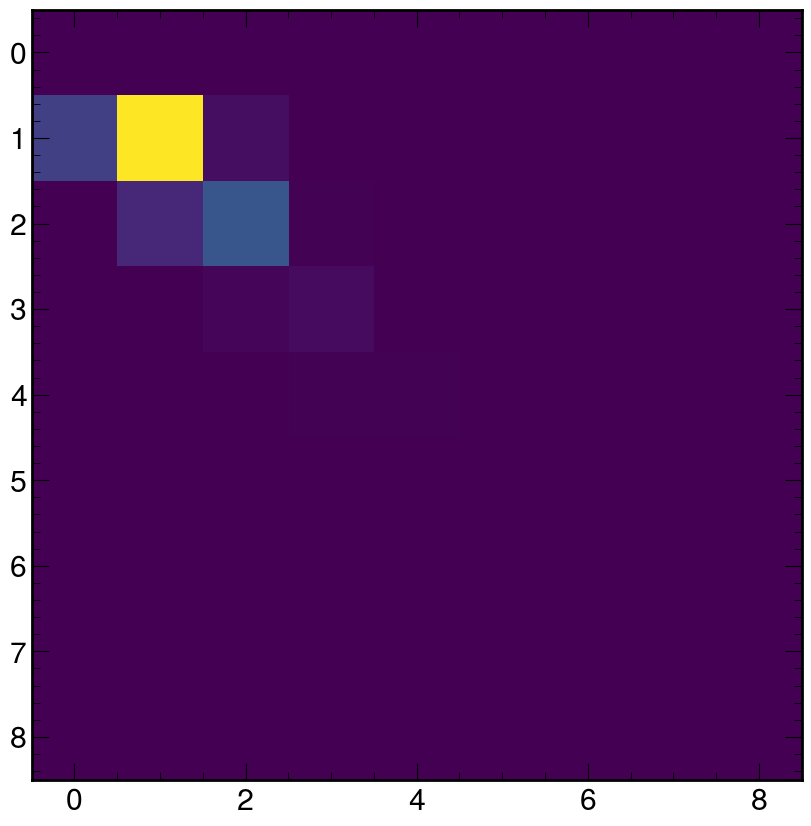

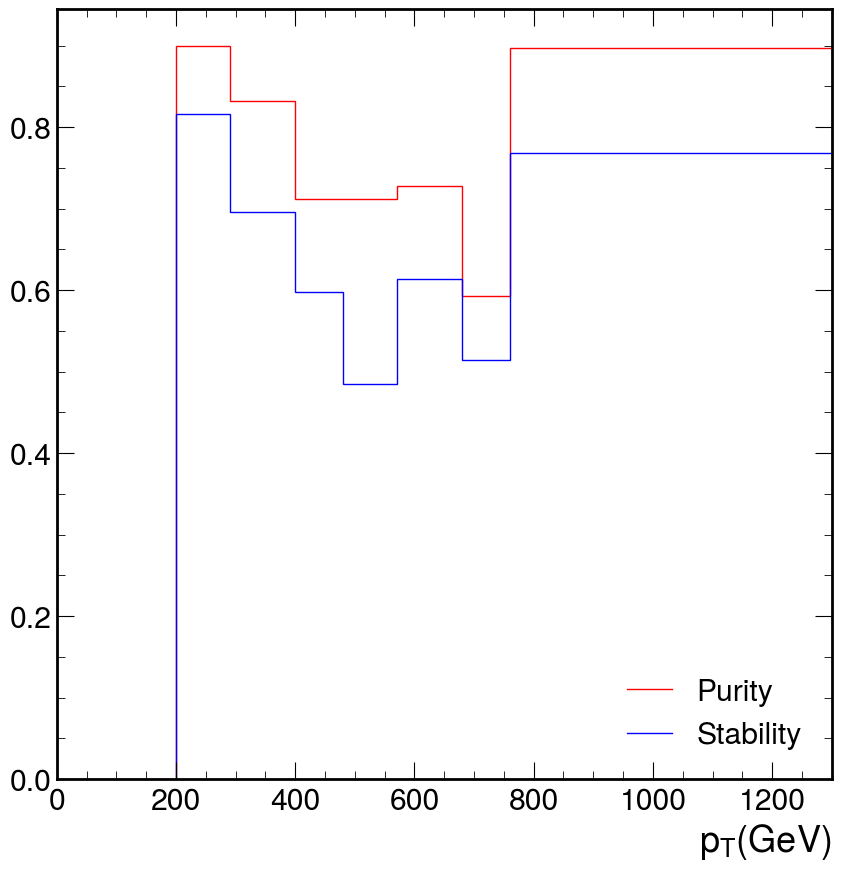

In [5]:
#### Get 1D pT response including underflow
ptresponse_u, ptreco_edges, ptgen_edges = result['response_matrix_u'][{'syst':"nominal"}].project("ptreco", "ptgen").to_numpy(flow=True)
print(ptreco_edges)
plt.imshow(ptresponse_u)
ptreco_edges[0]=0.
ptgen_edges[0]=0.
print(ptgen_edges)
pt_diags = np.array([ptresponse_u[i,i] for i in range(len(ptgen_edges)-1)])
print(pt_diags)
ptgen_tot_vals = result['response_matrix_u'][{'syst':"nominal"}].project("ptgen").values(flow=True)
ptreco_tot_vals = result['response_matrix_u'][{'syst':"nominal"}].project("ptreco").values(flow=True)
purity_vals = np.divide(pt_diags, ptgen_tot_vals, out=np.empty(pt_diags.shape)*np.nan, where=ptgen_tot_vals!=0)
stability_vals = np.divide(pt_diags, ptreco_tot_vals, out=np.empty(pt_diags.shape)*np.nan, where=ptreco_tot_vals!=0)
fig, ax = plt.subplots()
hep.histplot(purity_vals, ptreco_edges, stack=False, histtype='step',
                 ax=ax,color = 'Red', linewidth=1,
                 label="Purity")
hep.histplot(stability_vals, ptreco_edges, stack=False, histtype='step',
                 ax=ax, color = 'Blue', linewidth=1,
                 label="Stability")
ax.set_xlim(0,1300)
ax.set_xlabel(r"$p_T (GeV)$")
ax.legend()
# fig, ax = plt.subplots()
# hep.histplot(mcvals, stack=False, histtype='step',
#                  ax=ax, linestyle ='-', color = 'Black', linewidth=1, binwnorm=True,
#                  label=channel + " MC")


In [6]:
#### Get 1D pT response including underflow
def plotPurityStability(ptreco_edges, result, trim=None, groomed=False):
    if groomed:
        groom_str = "_g"
    else:
        groom_str = "_u"
    for i in range(len(ptreco_edges)-1):
        print(i)
        mresponse, mreco_edges, mgen_edges = result['response_matrix'+groom_str][{'syst':"nominal", "ptreco":i}].project("mreco", "mgen")[hist.rebin(2), :].to_numpy()
        plt.imshow(mresponse)
        mreco_edges[0]=0.
        mgen_edges[0]=0.
        print(mgen_edges)
        print(len(mresponse))
        print(ptgen_edges)
        m_diags = np.array([mresponse[j,j] for j in range(len(mgen_edges)-1)])
        print(pt_diags)
        mgen_tot_vals = result['response_matrix'+groom_str][{'syst':"nominal", "ptreco":i}].project("mgen").values()
        mreco_tot_vals = result['response_matrix'+groom_str][{'syst':"nominal", "ptreco":i}].project("mreco")[hist.rebin(2)].values()
        purity_vals = np.divide(m_diags, mgen_tot_vals, out=np.zeros_like(mgen_tot_vals), where=mgen_tot_vals!=0)
        stability_vals = np.divide(m_diags, mreco_tot_vals, out=np.zeros_like(mreco_tot_vals), where=mreco_tot_vals!=0)
        fig, ax = plt.subplots()
        widths = result['response_matrix'+groom_str][{'syst':"nominal", "ptreco":i}].project("mgen").axes[0].widths
        if trim!=None:
            print("Trimming last bin to be size of second to last bin")
            print("Original widths ", widths)
            print("Original edges ", mreco_edges)
            mreco_edges[-1] = trim
            widths[-1] = mreco_edges[-1] - mreco_edges[-2]
            print("New widths ", widths)
            print("New edges ", mreco_edges)
            xlim = trim
        else:
            xlim = mreco_edges[-1]
    
        hep.histplot(purity_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax,color = 'Red', linewidth=1,
                     label="Purity pT "+str(ptreco_edges[i+1])+"-"+str(round(ptreco_edges[i+2], 4)))
        hep.histplot(stability_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax, color = 'Blue', linewidth=1,
                     label="Stability")
        plt.hlines(0.5, 0, 400, color = 'k' , ls = '-.')
    
        ax.set_xlim(0, xlim)
        if groomed:
            ax.set_xlabel(r"Jet Mass$_{SD}$ [GeV]")
        else: ax.set_xlabel("Jet Mass [GeV]")
        if trim!=None:
            newticks = ax.get_xticks().tolist()
            newticks[-1] = r'$\infty$'
            print("new ticks ", newticks)
            ax.set_xticks(ax.get_xticks().tolist(),
               labels=newticks)
        hep.cms.label("Preliminary", com = 13, lumi = 136, data = False, loc=0, ax=ax);
        ax.legend()
        plt.show()

0
[   0.   10.   20.   40.   60.   80.  100.  150.  200.  300. 1300.]
10
[    0.   200.   290.   400.   480.   570.   680.   760. 13000.    inf]
[0.00000000e+00 1.27521851e+10 3.42905992e+09 3.81059448e+08
 7.81036852e+07 2.46963031e+07 5.60266020e+06 7.83895028e+06
 0.00000000e+00]
Trimming last bin to be size of second to last bin
Original widths  [  10.   10.   20.   20.   20.   20.   50.   50.  100. 1000.]
Original edges  [   0.   10.   20.   40.   60.   80.  100.  150.  200.  300. 1300.]
New widths  [ 10.  10.  20.  20.  20.  20.  50.  50. 100. 100.]
New edges  [  0.  10.  20.  40.  60.  80. 100. 150. 200. 300. 400.]
new ticks  [0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, '$\\infty$']


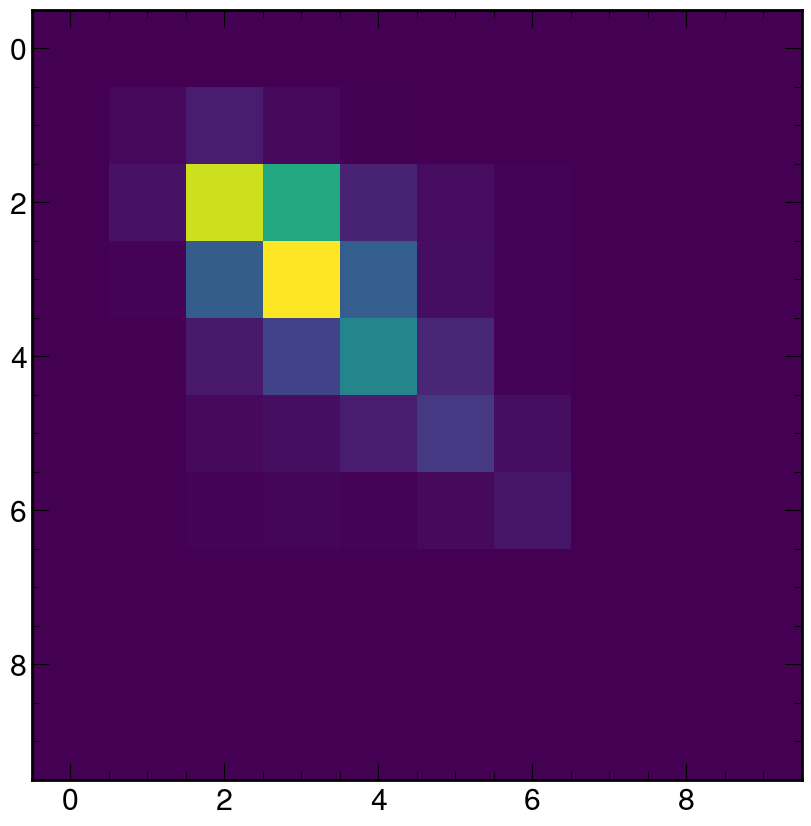

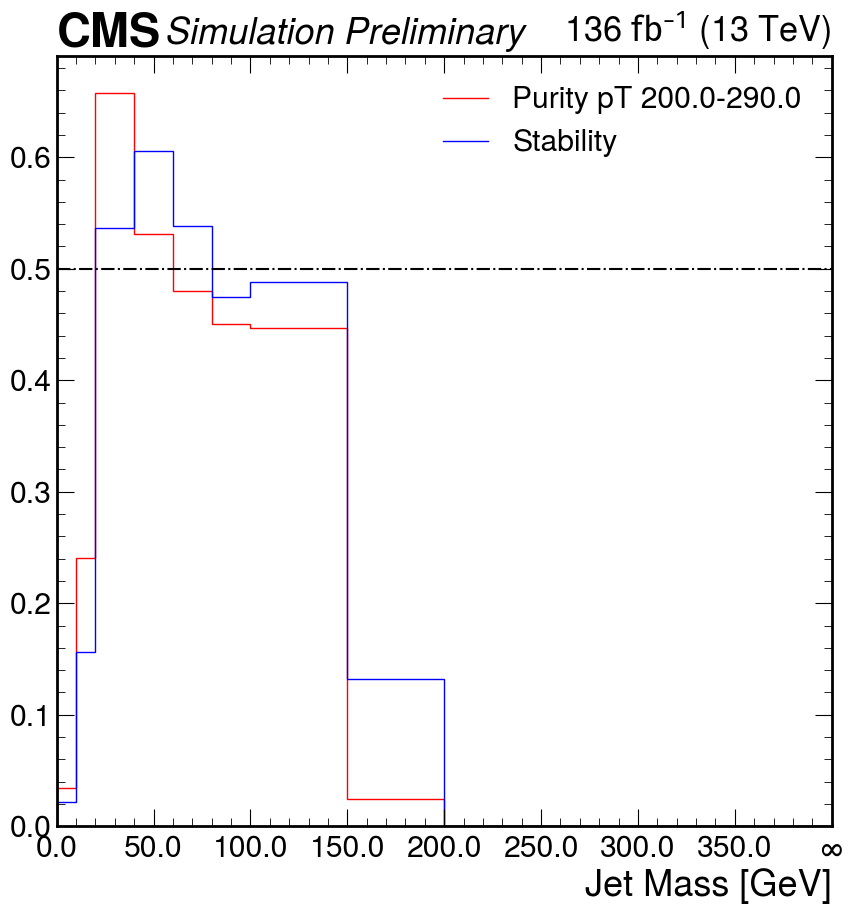

1
[   0.   10.   20.   40.   60.   80.  100.  150.  200.  300. 1300.]
10
[    0.   200.   290.   400.   480.   570.   680.   760. 13000.    inf]
[0.00000000e+00 1.27521851e+10 3.42905992e+09 3.81059448e+08
 7.81036852e+07 2.46963031e+07 5.60266020e+06 7.83895028e+06
 0.00000000e+00]
Trimming last bin to be size of second to last bin
Original widths  [  10.   10.   20.   20.   20.   20.   50.   50.  100. 1000.]
Original edges  [   0.   10.   20.   40.   60.   80.  100.  150.  200.  300. 1300.]
New widths  [ 10.  10.  20.  20.  20.  20.  50.  50. 100. 100.]
New edges  [  0.  10.  20.  40.  60.  80. 100. 150. 200. 300. 400.]
new ticks  [0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, '$\\infty$']


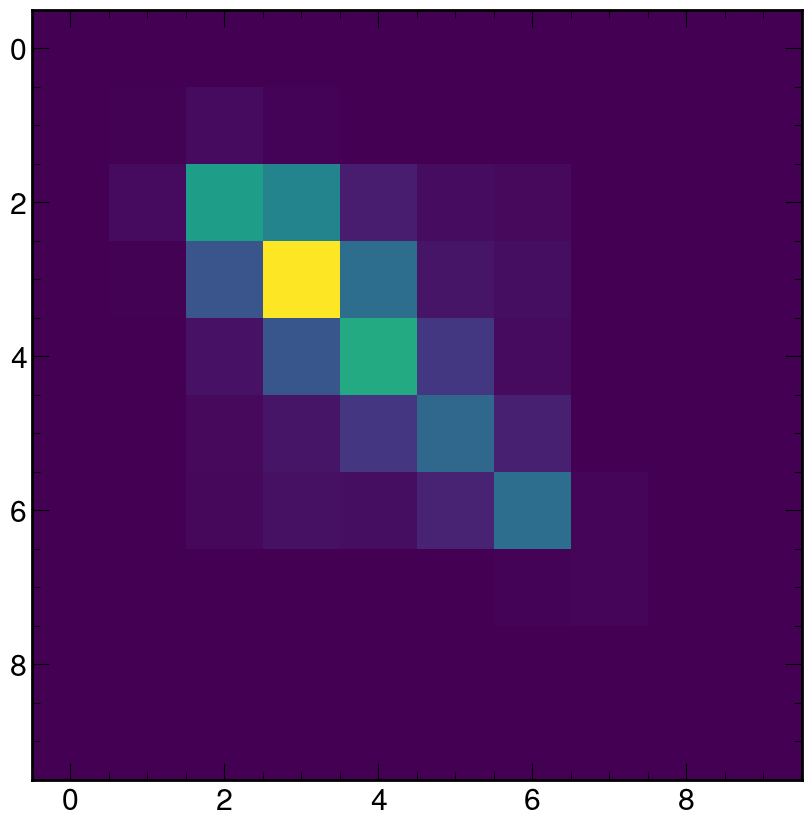

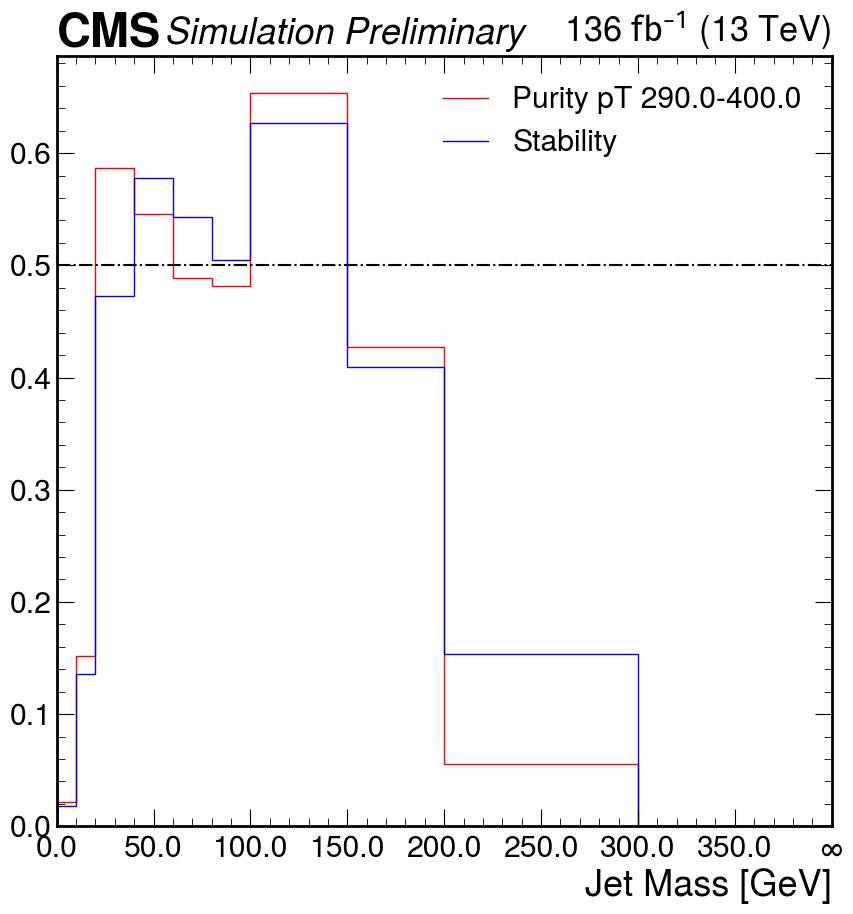

2
[   0.   10.   20.   40.   60.   80.  100.  150.  200.  300. 1300.]
10
[    0.   200.   290.   400.   480.   570.   680.   760. 13000.    inf]
[0.00000000e+00 1.27521851e+10 3.42905992e+09 3.81059448e+08
 7.81036852e+07 2.46963031e+07 5.60266020e+06 7.83895028e+06
 0.00000000e+00]
Trimming last bin to be size of second to last bin
Original widths  [  10.   10.   20.   20.   20.   20.   50.   50.  100. 1000.]
Original edges  [   0.   10.   20.   40.   60.   80.  100.  150.  200.  300. 1300.]
New widths  [ 10.  10.  20.  20.  20.  20.  50.  50. 100. 100.]
New edges  [  0.  10.  20.  40.  60.  80. 100. 150. 200. 300. 400.]
new ticks  [0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, '$\\infty$']


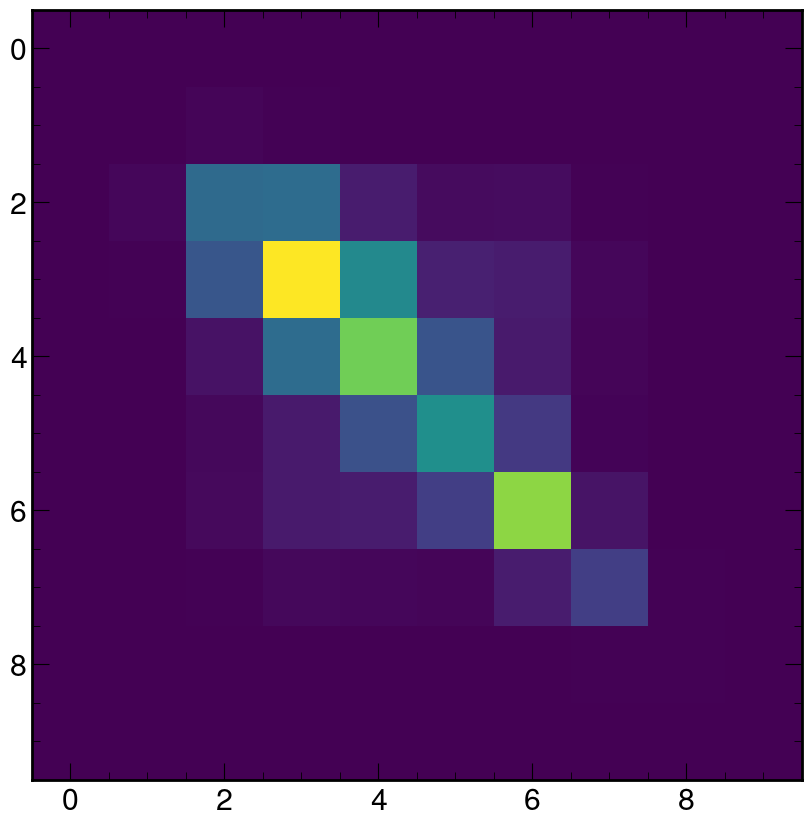

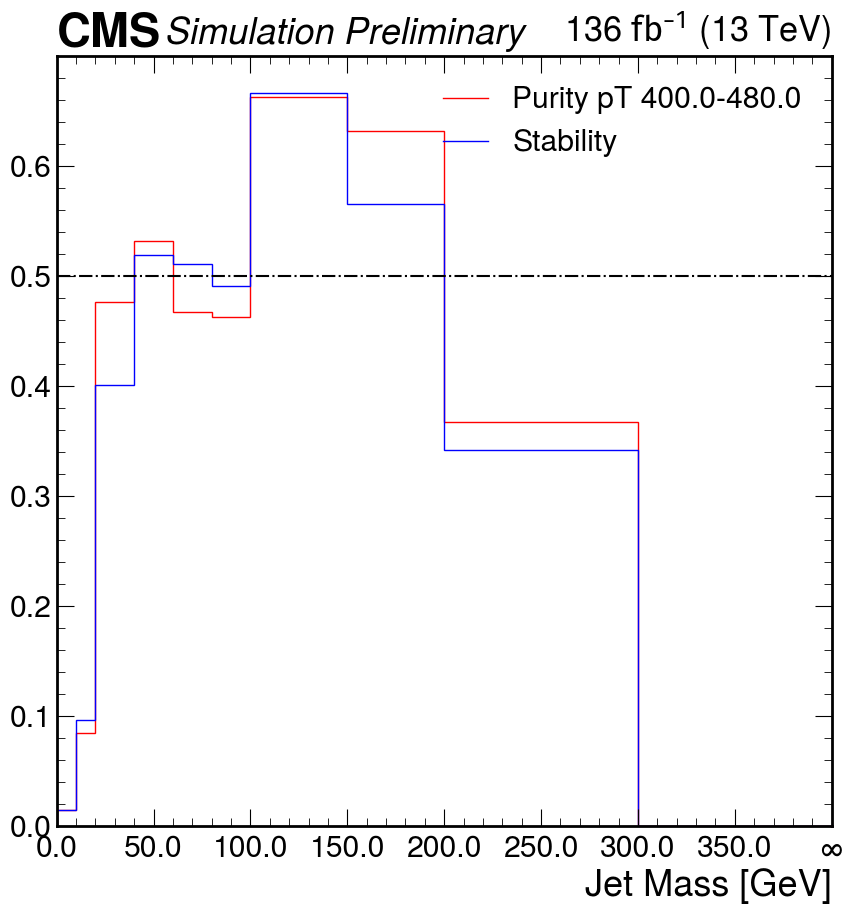

3
[   0.   10.   20.   40.   60.   80.  100.  150.  200.  300. 1300.]
10
[    0.   200.   290.   400.   480.   570.   680.   760. 13000.    inf]
[0.00000000e+00 1.27521851e+10 3.42905992e+09 3.81059448e+08
 7.81036852e+07 2.46963031e+07 5.60266020e+06 7.83895028e+06
 0.00000000e+00]
Trimming last bin to be size of second to last bin
Original widths  [  10.   10.   20.   20.   20.   20.   50.   50.  100. 1000.]
Original edges  [   0.   10.   20.   40.   60.   80.  100.  150.  200.  300. 1300.]
New widths  [ 10.  10.  20.  20.  20.  20.  50.  50. 100. 100.]
New edges  [  0.  10.  20.  40.  60.  80. 100. 150. 200. 300. 400.]
new ticks  [0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, '$\\infty$']


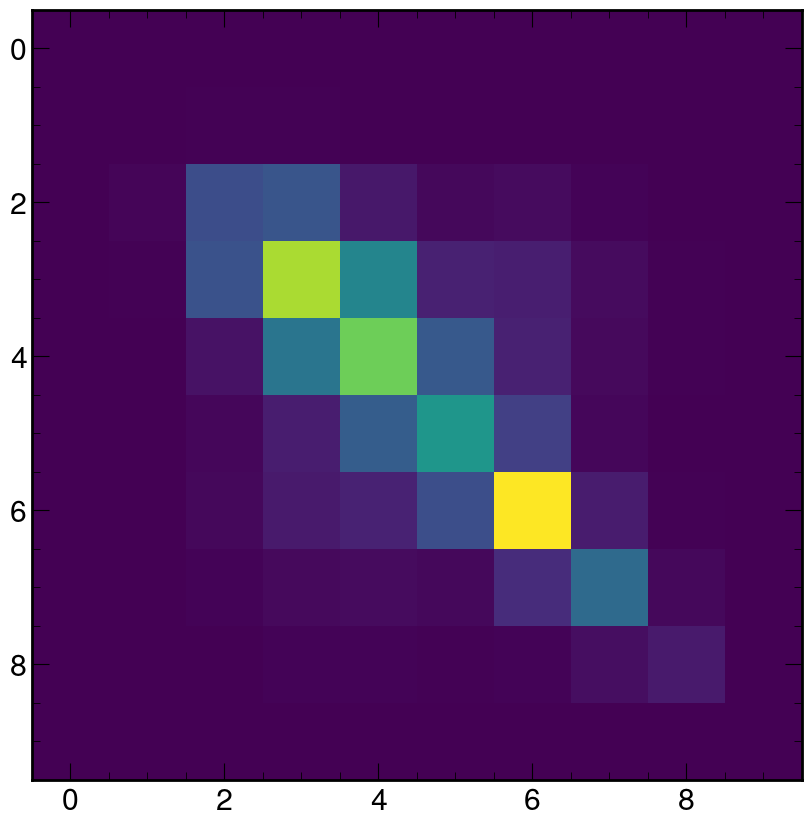

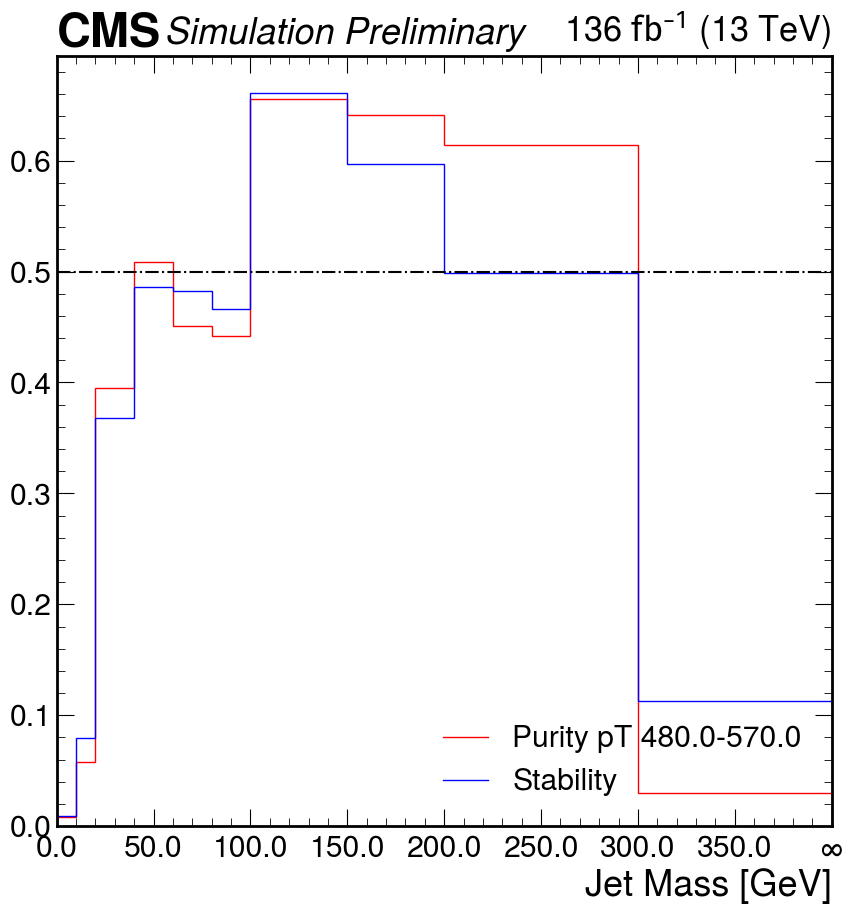

4
[   0.   10.   20.   40.   60.   80.  100.  150.  200.  300. 1300.]
10
[    0.   200.   290.   400.   480.   570.   680.   760. 13000.    inf]
[0.00000000e+00 1.27521851e+10 3.42905992e+09 3.81059448e+08
 7.81036852e+07 2.46963031e+07 5.60266020e+06 7.83895028e+06
 0.00000000e+00]
Trimming last bin to be size of second to last bin
Original widths  [  10.   10.   20.   20.   20.   20.   50.   50.  100. 1000.]
Original edges  [   0.   10.   20.   40.   60.   80.  100.  150.  200.  300. 1300.]
New widths  [ 10.  10.  20.  20.  20.  20.  50.  50. 100. 100.]
New edges  [  0.  10.  20.  40.  60.  80. 100. 150. 200. 300. 400.]
new ticks  [0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, '$\\infty$']


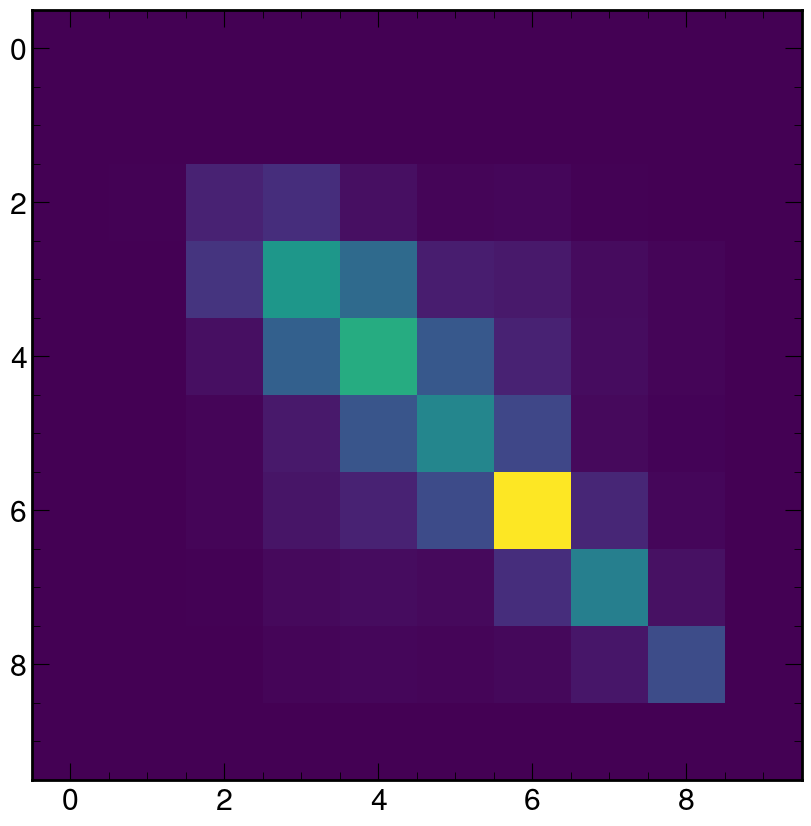

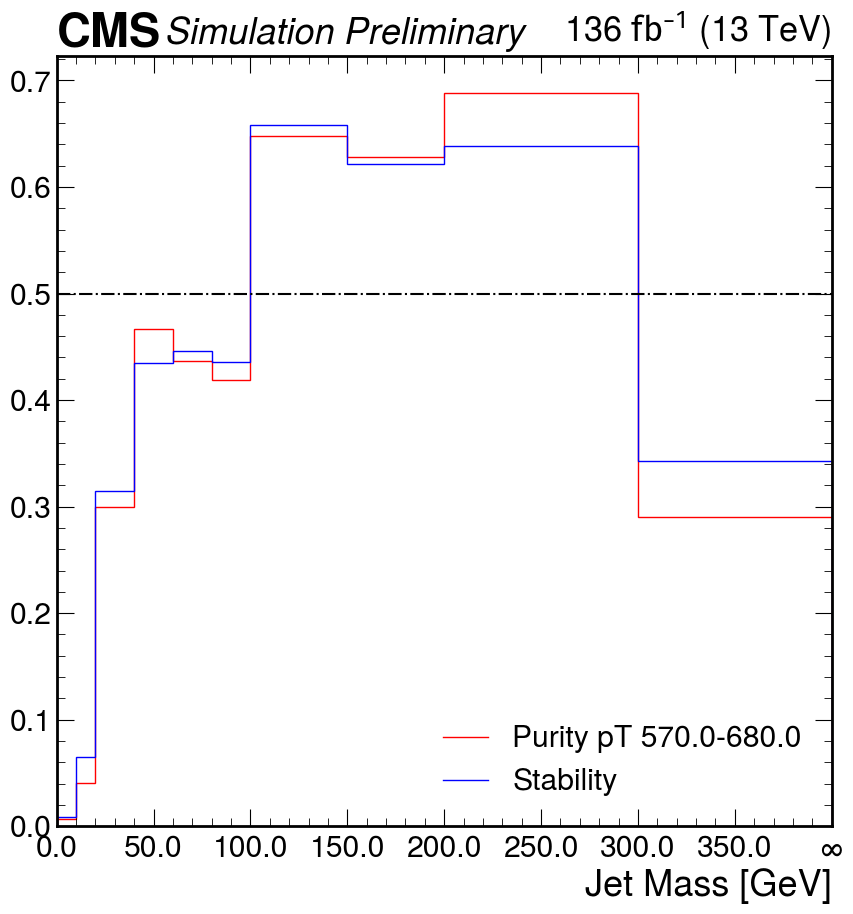

5
[   0.   10.   20.   40.   60.   80.  100.  150.  200.  300. 1300.]
10
[    0.   200.   290.   400.   480.   570.   680.   760. 13000.    inf]
[0.00000000e+00 1.27521851e+10 3.42905992e+09 3.81059448e+08
 7.81036852e+07 2.46963031e+07 5.60266020e+06 7.83895028e+06
 0.00000000e+00]
Trimming last bin to be size of second to last bin
Original widths  [  10.   10.   20.   20.   20.   20.   50.   50.  100. 1000.]
Original edges  [   0.   10.   20.   40.   60.   80.  100.  150.  200.  300. 1300.]
New widths  [ 10.  10.  20.  20.  20.  20.  50.  50. 100. 100.]
New edges  [  0.  10.  20.  40.  60.  80. 100. 150. 200. 300. 400.]
new ticks  [0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, '$\\infty$']


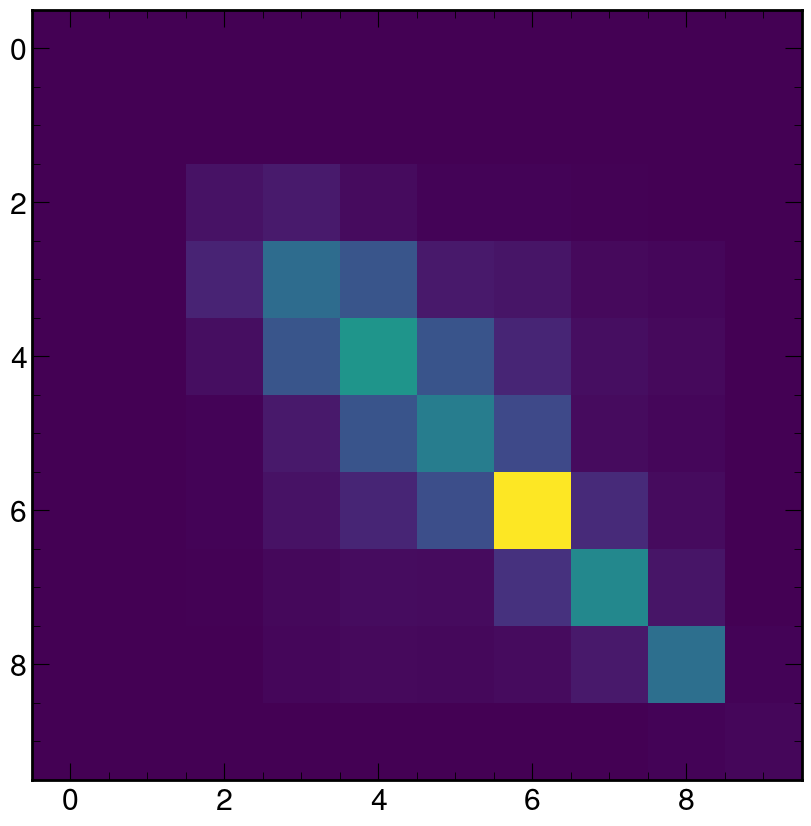

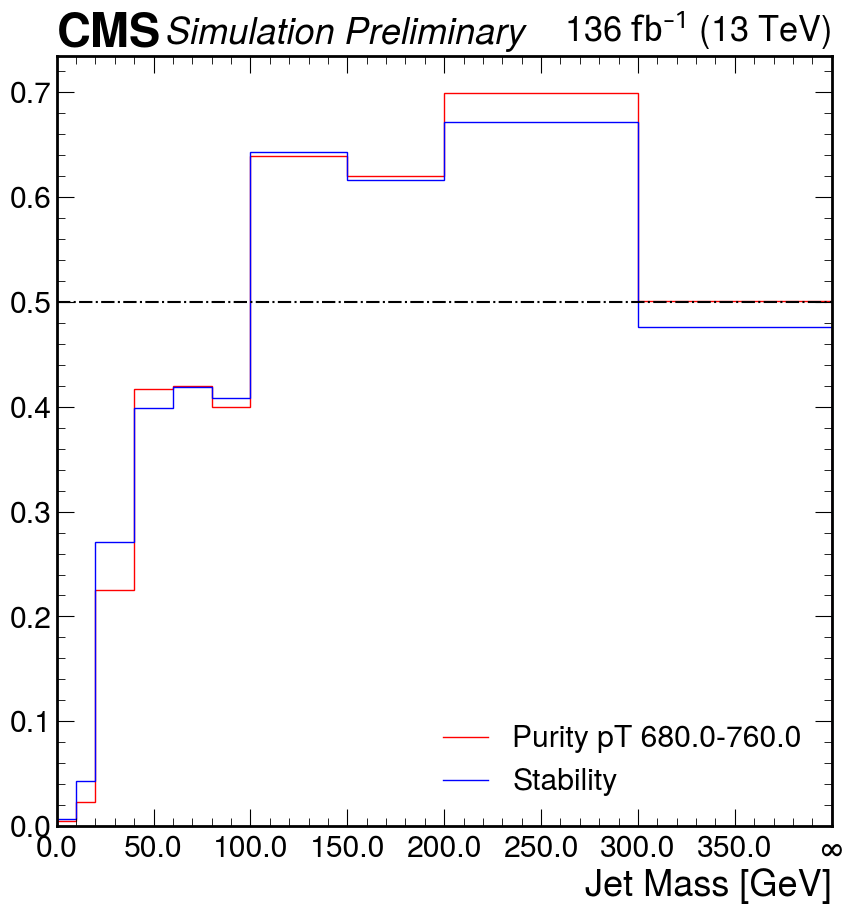

6
[   0.   10.   20.   40.   60.   80.  100.  150.  200.  300. 1300.]
10
[    0.   200.   290.   400.   480.   570.   680.   760. 13000.    inf]
[0.00000000e+00 1.27521851e+10 3.42905992e+09 3.81059448e+08
 7.81036852e+07 2.46963031e+07 5.60266020e+06 7.83895028e+06
 0.00000000e+00]
Trimming last bin to be size of second to last bin
Original widths  [  10.   10.   20.   20.   20.   20.   50.   50.  100. 1000.]
Original edges  [   0.   10.   20.   40.   60.   80.  100.  150.  200.  300. 1300.]
New widths  [ 10.  10.  20.  20.  20.  20.  50.  50. 100. 100.]
New edges  [  0.  10.  20.  40.  60.  80. 100. 150. 200. 300. 400.]
new ticks  [0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, '$\\infty$']


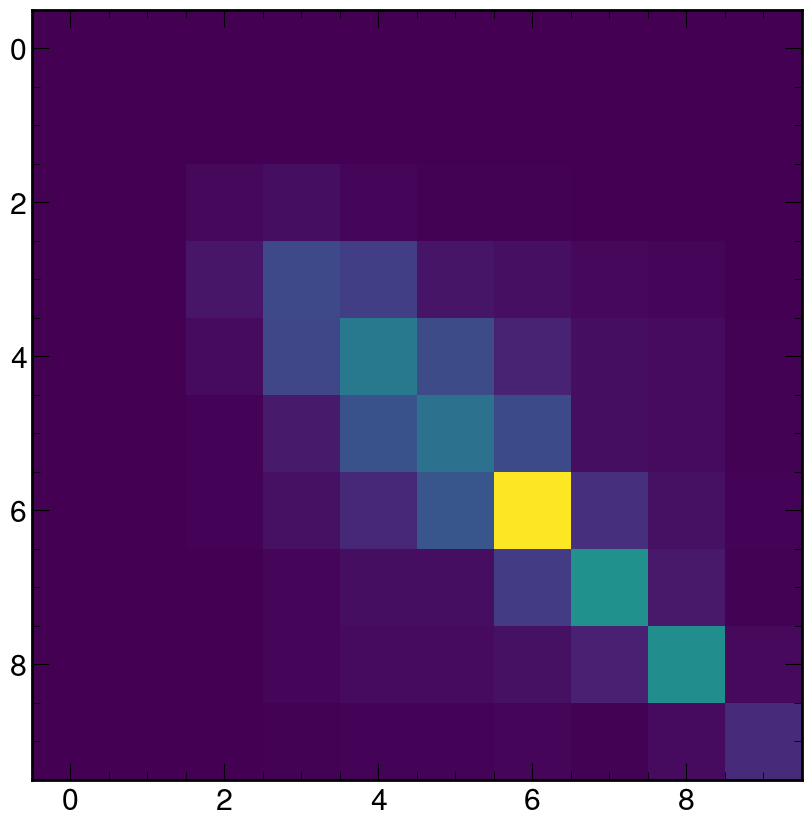

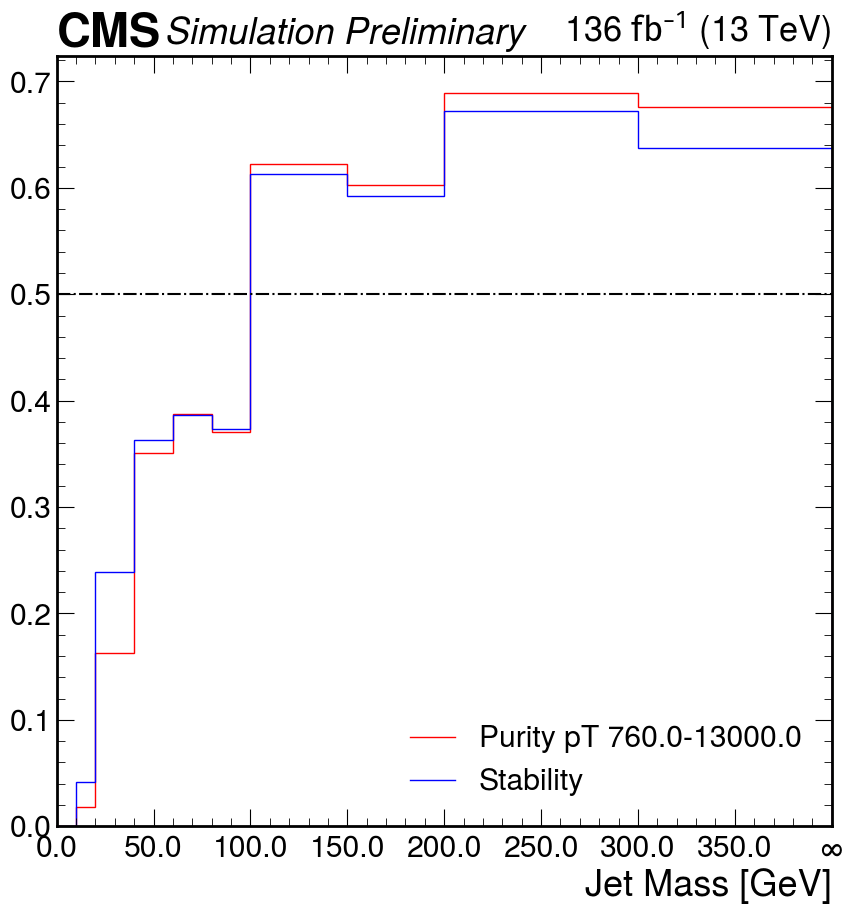

7


IndexError: histogram index is out of range

In [7]:
plotPurityStability(ptreco_edges, result, trim=400., groomed=False)

In [ ]:
plotPurityStability(ptreco_edges, result, trim=400., groomed=True)

In [ ]:
#### Get 1D pT response including underflow
for i in range(len(ptreco_edges)-3):
    print(i)
    mresponse_u, mreco_edges, mgen_edges = result['response_matrix_u'][{'syst':"nominal", "ptreco":i}].project("mreco", "mgen")[hist.rebin(2), :].to_numpy(flow=True)
    plt.imshow(mresponse_u)
    mreco_edges[0]=0.
    mgen_edges[0]=0.
    print(mgen_edges)
    m_diags = np.array([mresponse_u[j,j] for j in range(len(mgen_edges)-1)])
    print(pt_diags)
    mgen_tot_vals = result['response_matrix_u'][{'syst':"nominal", "ptreco":i}].project("mgen").values(flow=True)
    mreco_tot_vals = result['response_matrix_u'][{'syst':"nominal", "ptreco":i}].project("mreco")[hist.rebin(2)].values(flow=True)
    purity_vals = np.divide(m_diags, mgen_tot_vals, out=np.zeros_like(mgen_tot_vals), where=mgen_tot_vals!=0)
    stability_vals = np.divide(m_diags, mreco_tot_vals, out=np.zeros_like(mreco_tot_vals), where=mreco_tot_vals!=0)
    fig, ax = plt.subplots()
    hep.histplot(purity_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax,color = 'Red', linewidth=1,
                     label="Purity pT reco "+str(ptreco_edges[i+1])+"-"+str(ptreco_edges[i+2]))
    hep.histplot(stability_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax, color = 'Blue', linewidth=1,
                     label="Stability")
    ax.set_xlim(0,1300)
    ax.legend()
    # fig, ax = plt.subplots()
    # hep.histplot(mcvals, stack=False, histtype='step',
    #                  ax=ax, linestyle ='-', color = 'Black', linewidth=1, binwnorm=True,
    #                  label=channel + " MC")
    plt.show()

In [ ]:
print(mgen_edges)
print(mgen_edges[1:]-mgen_edges[:-1])
mgen_edges_new = np.array([ 0.,0.,20.,80.,80.,100.,150., 200.,250.,450., 1000., np.inf])
print(mgen_edges_new[1:]-mgen_edges_new[:-1])

In [ ]:
#### Get 1D pT response including underflow
for i in range(len(ptreco_edges)-3):
    print(i)
    mresponse_u, mreco_edges, mgen_edges = result['response_matrix_u'][{'syst':"nominal", "ptreco":i, "ptgen":i}].project("mreco", "mgen")[hist.rebin(2), :].to_numpy(flow=True)
    plt.imshow(mresponse_u)
    mreco_edges[0]=0.
    mgen_edges[0]=0.
    print(mgen_edges)
    m_diags = np.array([mresponse_u[j,j] for j in range(len(mgen_edges)-1)])
    print(pt_diags)
    mgen_tot_vals = result['response_matrix_u'][{'syst':"nominal", "ptreco":i, "ptgen":i}].project("mgen").values(flow=True)
    mreco_tot_vals = result['response_matrix_u'][{'syst':"nominal", "ptreco":i, "ptgen":i}].project("mreco")[hist.rebin(2)].values(flow=True)
    purity_vals = np.divide(m_diags, mgen_tot_vals, out=np.zeros_like(mgen_tot_vals), where=mgen_tot_vals!=0)
    stability_vals = np.divide(m_diags, mreco_tot_vals, out=np.zeros_like(mreco_tot_vals), where=mreco_tot_vals!=0)
    fig, ax = plt.subplots()
    hep.histplot(purity_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax,color = 'Red', linewidth=1,
                     label="Purity pT "+str(ptreco_edges[i+1])+"-"+str(ptreco_edges[i+2]))
    print(ptgen_hist[hist.underflow])
    hep.histplot(stability_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax, color = 'Blue', linewidth=1,
                     label="Stability pT gen "+str(ptgen_edges[i+1])+"-"+str(ptgen_edges[i+2]))
    ax.set_xlim(0,1300)
    ax.legend()
    # fig, ax = plt.subplots()
    # hep.histplot(mcvals, stack=False, histtype='step',
    #                  ax=ax, linestyle ='-', color = 'Black', linewidth=1, binwnorm=True,
    #                  label=channel + " MC")
    plt.show()

In [ ]:
#### Get 1D pT response including underflow
for i in range(len(ptreco_edges)-3):
    print(i)
    mresponse_g, mreco_edges, mgen_edges = result['response_matrix_g'][{'syst':"nominal", "ptreco":i, "ptgen":i}].project("mreco", "mgen")[hist.rebin(2), :].to_numpy(flow=True)
    plt.imshow(mresponse_u)
    mreco_edges[0]=0.
    mgen_edges[0]=0.
    print(mgen_edges)
    m_diags = np.array([mresponse_g[j,j] for j in range(len(mgen_edges)-1)])
    print(pt_diags)
    mgen_tot_vals = result['response_matrix_g'][{'syst':"nominal", "ptreco":i, "ptgen":i}].project("mgen").values(flow=True)
    mreco_tot_vals = result['response_matrix_g'][{'syst':"nominal", "ptreco":i, "ptgen":i}].project("mreco")[hist.rebin(2)].values(flow=True)
    purity_vals = np.divide(m_diags, mgen_tot_vals, out=np.zeros_like(mgen_tot_vals), where=mgen_tot_vals!=0)
    stability_vals = np.divide(m_diags, mreco_tot_vals, out=np.zeros_like(mreco_tot_vals), where=mreco_tot_vals!=0)
    fig, ax = plt.subplots()
    hep.histplot(purity_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax,color = 'Red', linewidth=1,
                     label="Purity pT "+str(ptreco_edges[i+1])+"-"+str(ptreco_edges[i+2]))
    print(ptgen_hist[hist.underflow])
    hep.histplot(stability_vals, mreco_edges, stack=False, histtype='step',
                     ax=ax, color = 'Blue', linewidth=1,
                     label="Stability pT gen "+str(ptgen_edges[i+1])+"-"+str(ptgen_edges[i+2]))
    ax.set_xlim(0,1300)
    ax.legend()
    # fig, ax = plt.subplots()
    # hep.histplot(mcvals, stack=False, histtype='step',
    #                  ax=ax, linestyle ='-', color = 'Black', linewidth=1, binwnorm=True,
    #                  label=channel + " MC")
    plt.show()